# Boston Housing Dataset

## Step 0: Basic library imports

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import sklearn
import pandas as pd
import seaborn as sns

## Step 1: Load dataset

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
# to see the shape of dataset
type(boston.data), boston.data.shape

(numpy.ndarray, (506, 13))

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Pandas dataframe

In [6]:
# Now let’s convert it into pandas Dataframe
df_feat = pd.DataFrame(boston.data)
print(df_feat.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [7]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
# convert the index to the column names
df_feat.columns = boston.feature_names
df_feat.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
df_tar = pd.DataFrame(boston.target)
df_tar.columns = ["MEDV"]

In [10]:
df = pd.concat([df_feat, df_tar], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

## Step 2: Data Visualisation and Feature selection

### 2.1. Check dtype

In [11]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

As all are numeric so no work needed here

### 2.2. Correlation

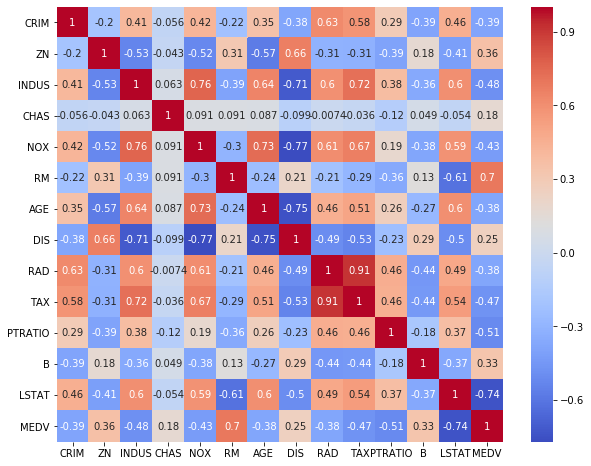

In [12]:
ax, fig = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

- From correlation matrix, we see TAX and RAD are highly correlated features. 
- The columns LSTAT,  PTRAIO, INDUS, TAX, NOX, RM has a correlation score above 0.5 with MEDV which is a good indication of using as predictors.

Lets drop "RAD" as a feature

In [13]:
del df["RAD"]

### 2.3. Outliers

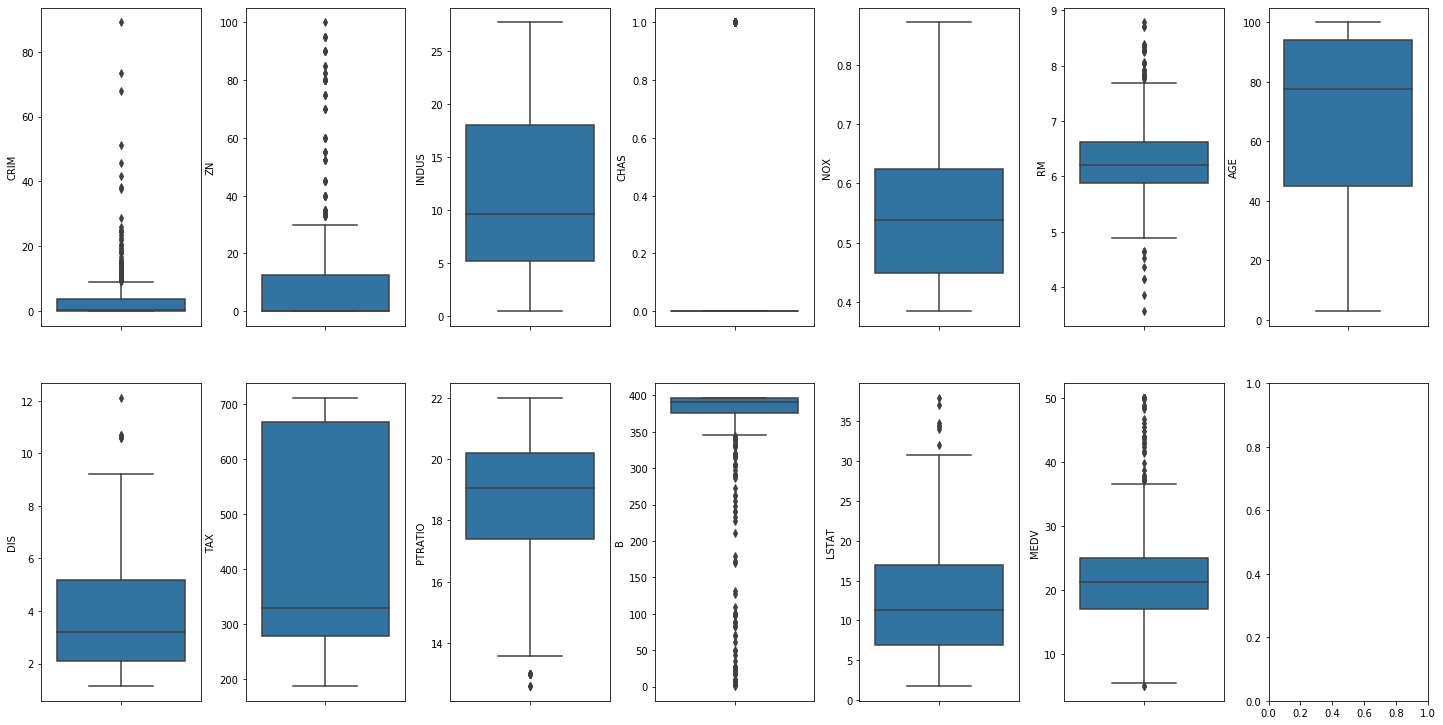

In [14]:
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Columns like CRIM, ZN, RM, B seems to have outliers. Let's see the outliers percentage in every column.

In [15]:
for k, v in df.items(): #k=column_name, v=values
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


Let's try and remove outliers form the target variable

In [16]:
df["MEDV"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [18]:
#lower range
df["MEDV"].quantile(0.25) - 1.5*(df["MEDV"].quantile(0.75) - df["MEDV"].quantile(0.25))

5.0624999999999964

In [19]:
#upper range
df["MEDV"].quantile(0.75) + 1.5*(df["MEDV"].quantile(0.75) - df["MEDV"].quantile(0.25))

36.962500000000006

In [20]:
df["MEDV"].value_counts().sort_index()

5.0      2
5.6      1
6.3      1
7.0      2
7.2      3
7.4      1
7.5      1
8.1      1
8.3      2
8.4      2
8.5      2
8.7      1
8.8      2
9.5      1
9.6      1
9.7      1
10.2     3
10.4     2
10.5     2
10.8     1
10.9     2
11.0     1
11.3     1
11.5     1
11.7     2
11.8     2
11.9     2
12.0     1
12.1     1
12.3     1
        ..
35.2     1
35.4     2
36.0     1
36.1     1
36.2     2
36.4     1
36.5     1
37.0     1
37.2     1
37.3     1
37.6     1
37.9     1
38.7     1
39.8     1
41.3     1
41.7     1
42.3     1
42.8     1
43.1     1
43.5     1
43.8     1
44.0     1
44.8     1
45.4     1
46.0     1
46.7     1
48.3     1
48.5     1
48.8     1
50.0    16
Name: MEDV, Length: 229, dtype: int64

In [21]:
df = df[~(df['MEDV'] == 50.0)]
df.shape

(490, 13)

### 2.4. Missing values

In [22]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### 2.5. Data distribution

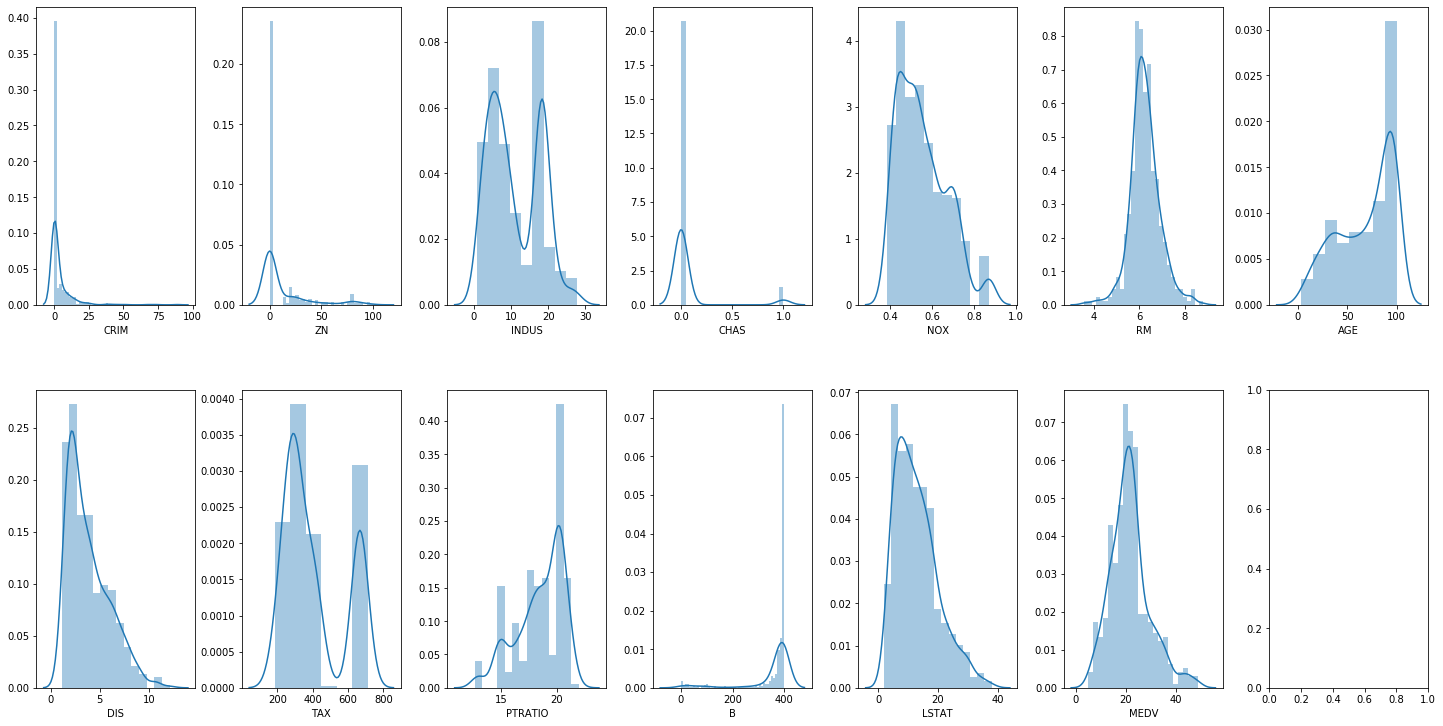

In [23]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

- The histogram shows that columns CRIM, ZN, B has highly skewed distributions. 
- Also MEDV looks to have a normal distribution (the predictions) and other colums seem to have norma or bimodel ditribution of data except CHAS (which is a discrete variable).

Let's try to remove the skewness of the data trough log transformation.

In [24]:
for col in ["CRIM", "ZN", "B"]:
    print(col)
    print(df[col].skew())
    df[col] = np.log1p(df[col])

CRIM
5.163721825193085
ZN
2.241577628695278
B
-2.832124612842033


## Step 3: Defining Training and Test Set

In [27]:
#X- feature, y-target
X, y = df.loc[:,df.columns!="MEDV"].values, df["MEDV"].values
X.shape, y.shape

((490, 12), (490,))

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(343, 12)
(147, 12)
(343,)
(147,)


## Step 4: Data Scaling

In [29]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000
mean,0.807993,0.945104,11.113143,0.059184,0.554307,6.245471,68.27898,3.834519,408.002041,18.520000,5.753395,12.92402,21.635918
std,1.028565,1.611798,6.821302,0.236209,0.116688,0.653147,28.16479,2.109948,168.065190,2.110478,0.740437,7.08318,7.865301
min,0.006300,0.000000,0.740000,0.000000,0.385000,3.561000,2.90000,1.137000,187.000000,12.600000,0.277632,1.98000,5.000000
25%,0.078853,0.000000,5.190000,0.000000,0.449000,5.881000,44.55000,2.111050,280.250000,17.400000,5.932013,7.34750,16.700000
50%,0.221148,0.000000,9.690000,0.000000,0.538000,6.185000,76.80000,3.275900,330.000000,19.100000,5.973224,11.67500,20.900000
75%,1.536265,2.602690,18.100000,0.000000,0.624000,6.578000,93.87500,5.214600,666.000000,20.200000,5.984748,17.11750,24.675000
max,4.499545,4.615121,27.740000,1.000000,0.871000,8.780000,100.00000,12.126500,711.000000,22.000000,5.986201,37.97000,48.800000


In [30]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler().fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

In [31]:
pd.DataFrame(X_train, columns=df.columns.drop("MEDV")).describe().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,343.000,343.000,343.000,343.000,343.000,343.000,343.000,343.000,343.000,343.000,343.000,343.000
mean,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-0.782,-0.617,-1.422,-0.262,-1.390,-4.008,-2.351,-1.246,-1.314,-2.656,-6.282,-1.488
25%,-0.713,-0.617,-0.859,-0.262,-0.913,-0.573,-0.776,-0.796,-0.763,-0.680,0.241,-0.789
50%,-0.571,-0.617,-0.361,-0.262,-0.265,-0.103,0.352,-0.308,-0.458,0.194,0.298,-0.201
75%,0.715,1.236,1.024,-0.262,0.715,0.524,0.899,0.739,1.553,0.837,0.316,0.571
max,3.449,2.162,2.422,3.820,2.691,3.691,1.102,3.870,1.822,1.664,0.316,3.463


## Step 5: Modelling

### 5.1. Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

The linear regression reports 95% confidence intervals for the regression parameters, and we can visualize what this means using the seaborn library, which plots the regression line and highlights the 95% (by default) confidence interval for the regression line:

Text(0.5, 1.0, 'Prices vs Predicted prices: $y_i$ vs $\\hat{y}$')

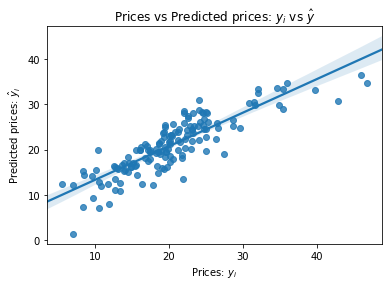

In [33]:
import seaborn as sns
ax = sns.regplot(y_test, y_pred);
ax.set_xlabel("Prices: $y_i$")
ax.set_ylabel("Predicted prices: $\hat{y}_i$")
ax.set_title("Prices vs Predicted prices: $y_i$ vs $\hat{y}$")

In [34]:
#calculating the error manually
np.sum((y_pred - y_test)**2)/y_test.shape[0]

13.861435283506797

In [35]:
#or you can import the Sklearn mse 
mse_ols = sklearn.metrics.mean_squared_error(y_test, y_pred)
print(mse_ols)

13.861435283506797


- For quantifying the model performace we will be calculating the coefficient of determination, R2.

- The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.

- The values for R2 range from `0 to 1`, which captures the percentage of `squared correlation between the predicted and actual values of the target variable`. 

- A model with an R2 of 0 is no better than a model that always predicts the mean of the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable. 

- Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features. A model can be given a negative R2 as well, which indicates that the model is arbitrarily worse than one that always predicts the mean of the target variable.

- For the performance_metric function in the code cell below, you will need to implement the following:
    - Use r2_score from sklearn.metrics to perform a performance calculation between y_true and y_predict.
    - Assign the performance score to the score variable.

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7360110982377226

### 5.2. Lasso Regression

In [37]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

Text(0.5, 1.0, 'Prices vs Predicted prices: $y_i$ vs $\\hat{y}$')

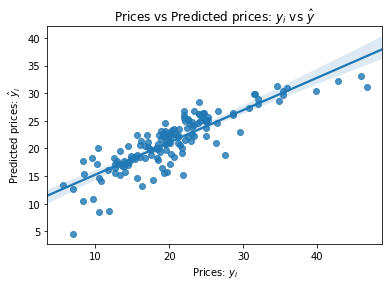

In [38]:
ax = sns.regplot(y_test, y_pred);
ax.set_xlabel("Prices: $y_i$")
ax.set_ylabel("Predicted prices: $\hat{y}_i$")
ax.set_title("Prices vs Predicted prices: $y_i$ vs $\hat{y}$")

In [39]:
mse_lasso = sklearn.metrics.mean_squared_error(y_test, y_pred)
print(mse_lasso)

16.48313362256451


### 5.3. Ridge Regression

In [40]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

Text(0.5, 1.0, 'Prices vs Predicted prices: $y_i$ vs $\\hat{y}$')

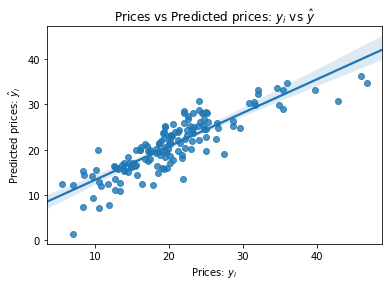

In [41]:
ax = sns.regplot(y_test, y_pred);
ax.set_xlabel("Prices: $y_i$")
ax.set_ylabel("Predicted prices: $\hat{y}_i$")
ax.set_title("Prices vs Predicted prices: $y_i$ vs $\hat{y}$")

In [42]:
mse_ridge = sklearn.metrics.mean_squared_error(y_test, y_pred)
print(mse_ridge)

13.837164323702948


## Summary

In [43]:
mse_all = {'ols'    : mse_ols, #ols = ordinary least square (Normal Linear Regression | Vanilla Linear Regression)
           'lasso'  : mse_lasso, #Linear regression with L1 regualrisation
           'ridge'  : mse_ridge} #Linear regression with L2 regularisation

for name, mse, in mse_all.items():
    print(f"{name:<7}: {mse:.4}")

ols    : 13.86
lasso  : 16.48
ridge  : 13.84


In [44]:
def reg_equation(coefs, names=None):
    
    "Create the regression equation with coefficents and names"
    
    if names is None:
        # Assign numbers to betas
        names = [f"X{_}" for _ in range(len(coefs))]
    equation = " \t+ \n".join("{:>6.3f}*{}".format(c, n.lower())
                                   for c, n in zip(coefs, names))
    return equation

In [45]:
print("OLS")
print(reg_equation(lm.coef_, names=boston.feature_names))
print()

print("Lasso")
lasso = Lasso()
lasso.fit(X_train, y_train)
print(reg_equation(lasso.coef_, names=boston.feature_names))
print()

print("Ridge")
ridge = Ridge()
ridge.fit(X_train, y_train)
print(reg_equation(ridge.coef_, names=boston.feature_names))
print()

OLS
-0.326*crim 	+ 
 0.686*zn 	+ 
-0.596*indus 	+ 
 0.088*chas 	+ 
-1.467*nox 	+ 
 2.486*rm 	+ 
-0.753*age 	+ 
-2.845*dis 	+ 
-0.435*rad 	+ 
-1.670*tax 	+ 
 0.692*ptratio 	+ 
-2.770*b

Lasso
-0.146*crim 	+ 
 0.000*zn 	+ 
-0.111*indus 	+ 
 0.000*chas 	+ 
-0.000*nox 	+ 
 2.173*rm 	+ 
-0.000*age 	+ 
-0.000*dis 	+ 
-0.678*rad 	+ 
-1.105*tax 	+ 
 0.000*ptratio 	+ 
-2.824*b

Ridge
-0.332*crim 	+ 
 0.675*zn 	+ 
-0.599*indus 	+ 
 0.088*chas 	+ 
-1.441*nox 	+ 
 2.488*rm 	+ 
-0.748*age 	+ 
-2.806*dis 	+ 
-0.438*rad 	+ 
-1.665*tax 	+ 
 0.690*ptratio 	+ 
-2.758*b



We can try some non prametric regression techniques: 
- SVR with kernal rbf, 
- DecisionTreeRegressor, 
- KNeighborsRegressor 